In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import itertools
import statistics
import numpy as np
import scipy
import scipy.stats as st

In [12]:
#Define the names of each parameter we're interested in and their plotting parameters
paramTags = {
    'voc' : ('$V_{oc}$'),
    'jsc' : ('$J_{sc}$'),
    'ff' : ('$FF$'),
    'pmax' : ('$P_{max}$'),
    'g' : ('$G$'),
    'r' : ('$R$'),
    'vmp' : ('$V_{mp}$'),
    'jmp' : ('$J_{mp}$')
}

marksize=2

sns.color_palette(palette='dark', n_colors=9, desat=None, as_cmap=False)

#Define functions to make Seaborn plots
def makeViolin(param,pos):
    plot = sns.violinplot(ax = axes[pos],data=globals()[''.join([param,'_df'])],inner=None)
    #plot = sns.catplot(kind='violin',ax = axes[pos],data=globals()[''.join([param,'_df'])],inner=None)

    plot= sns.stripplot(ax = axes[pos],data=globals()[''.join([param,'_df'])],color=".25",size=marksize)
    axes[pos].set_title(paramTags[param])
    return plot
def makeBox(param,pos):
    plot = sns.boxplot(ax = axes[pos],data=globals()[''.join([param,'_df'])])
    plot= sns.stripplot(ax = axes[pos],data=globals()[''.join([param,'_df'])],color=".25",size=marksize)
    axes[pos].set_title(paramTags[param])
    return plot


In [13]:
#Set working directory
directory = "D:/Cell-JV/2021/2021 05/P-I-N/"


os.chdir(directory)
jvFiles = []

#Import all files ending with jvtst and save to a list
for filename in os.listdir(directory):
    if filename.endswith('jvtst'):
        jvFiles.append(pd.read_csv(filename,sep='\t',names=list('abcdefgh'),encoding='cp1252'))

#Define tuple with parameter name and row location in df
#This is used to cut off low outliers
params = [('voc',13,0.5),('jsc',14,5/1000),('ff',15,30),('pmax',16,4/1000),('g',17,0),('r',18,0),('vmp',19,0),('jmp',20,0)]  

#Create dictionary for each parameter name e.g. vocDict
for i in params:
    locals()[''.join([i[0],'Dict'])] = {}


    sampleNames = []

for i in range(len(jvFiles)):
    Name = jvFiles[i]['b'][1][:-3]
    
    if Name not in vocDict.keys():
        sampleNames.append(Name)
        for j in params:

            if abs(float(jvFiles[i]['c'][j[1]])) < j[2]:
                jvFiles[i]['c'][j[1]] = np.nan
            
            locals()[''.join([j[0],'Dict'])][Name] = [float(jvFiles[i]['c'][j[1]])]
    else:
        for j in params:

            if abs(float(jvFiles[i]['c'][j[1]])) < j[2]:
                jvFiles[i]['c'][j[1]] = np.nan
                
            locals()[''.join([j[0],'Dict'])][Name].append(float(jvFiles[i]['c'][j[1]]))
            
lenmax = 0
for i in list(vocDict.keys()):
    if len(vocDict[i]) > lenmax:
        lenmax = len(vocDict[i])
for i in params:
    for j in list(locals()[''.join([i[0],'Dict'])].keys()):
        if len(locals()[''.join([i[0],'Dict'])][j]) < lenmax:
            addon = lenmax - len(locals()[''.join([i[0],'Dict'])][j])
            locals()[''.join([i[0],'Dict'])][j] = locals()[''.join([i[0],'Dict'])][j] + [np.nan]*addon

###########################################################            
print(sampleNames)

choose_samp_name = sampleNames
#choose_samp_name = ['1','2','3']

########################################################### 


for i in params:
    locals()[''.join([i[0],'_df'])] = pd.DataFrame.from_dict(locals()[''.join([i[0],'Dict'])])
    locals()[''.join([i[0],'_df'])].columns = choose_samp_name
    
jsc_df = jsc_df.multiply(-1000)
pmax_df = pmax_df.multiply(-1000)


['CS452', 'CS453', 'CS454']


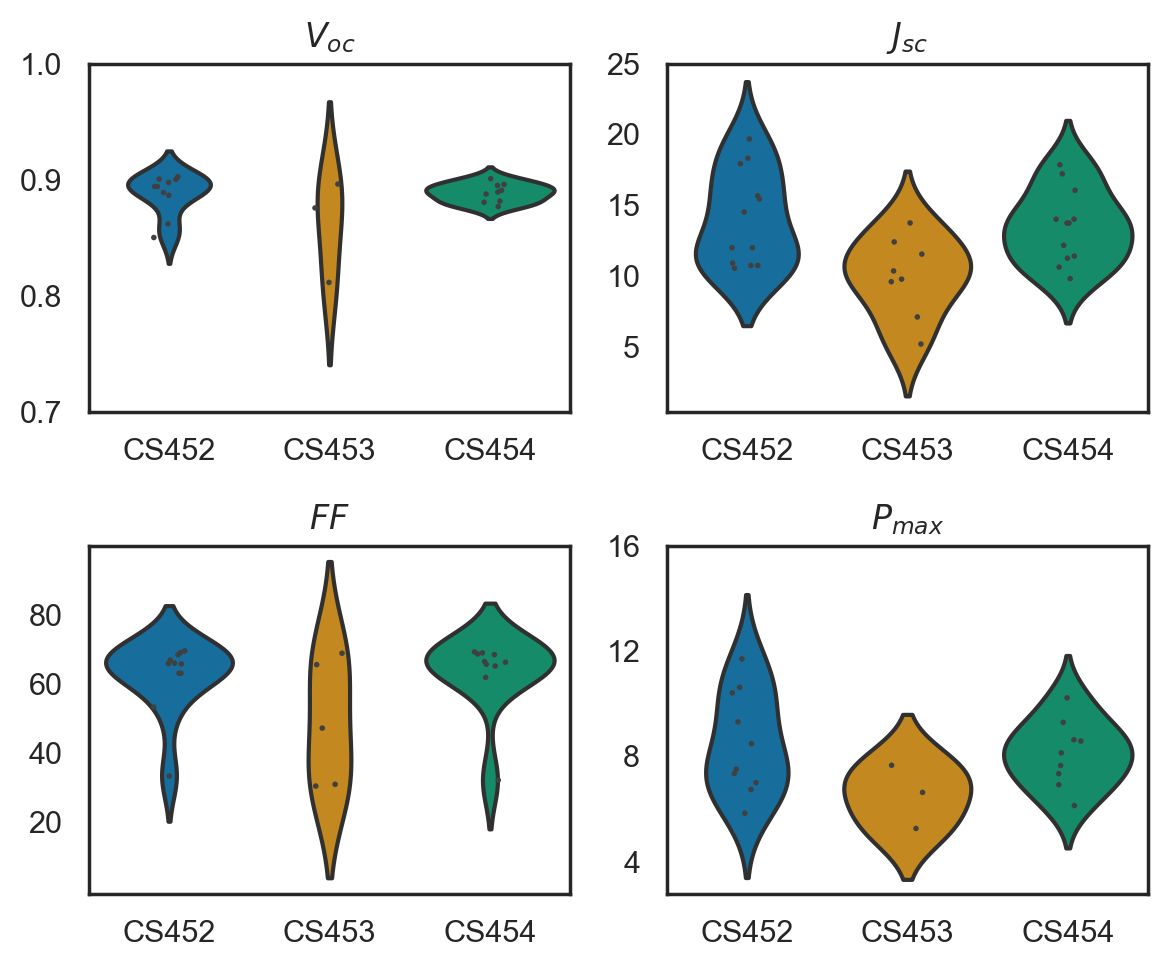

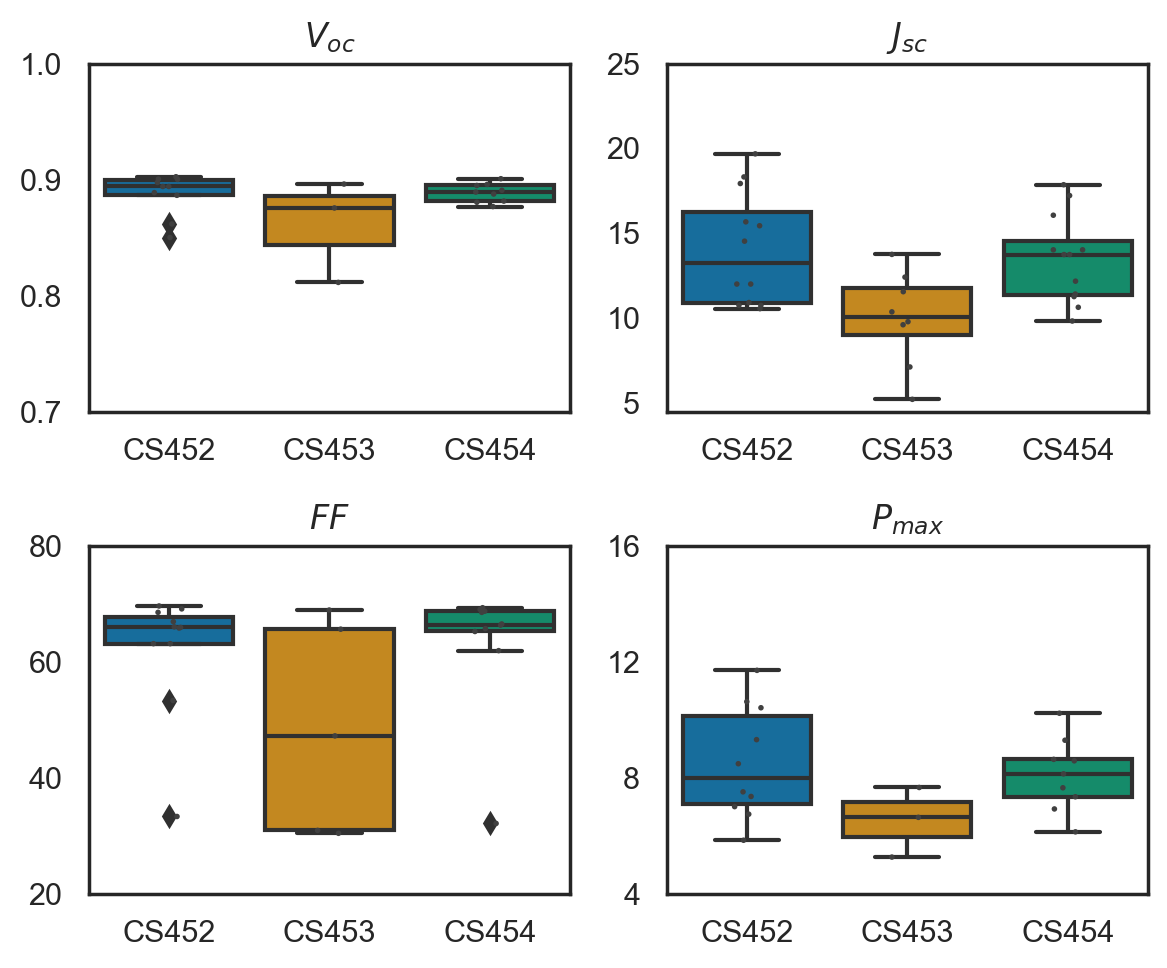

In [14]:
sns.set_theme(style="white",palette='colorblind')

#Violin Plots
fig, axes = plt.subplots(2,2, dpi=200, figsize=(6,5))

makeViolin('voc',(0,0),)
makeViolin('jsc',(0,1),)
makeViolin('ff',(1,0),)
makeViolin('pmax',(1,1),)


#Set tick marks for Violin plot
axes[0,0].set_yticks([0.7, 0.8, 0.9, 1.0]) 
axes[0,1].set_yticks([5,10,15,20,25]) 
axes[1,0].set_yticks([20,40,60,80]) 
axes[1,1].set_yticks([4,8,12,16]) 

plt.tight_layout()

plt.savefig('violin-plots',bbox_inches='tight',dpi=200)


#Box plots
sns.set_theme(style="white",palette='colorblind')

fig, axes = plt.subplots(2,2, dpi=200, figsize=(6,5))

makeBox('voc',(0,0))
makeBox('jsc',(0,1))
makeBox('ff',(1,0))
makeBox('pmax',(1,1))

#Set tick marks for Box plots
axes[0,0].set_yticks([0.7, 0.8, 0.9, 1.0]) 
axes[0,1].set_yticks([5,10,15,20,25]) 
axes[1,0].set_yticks([20,40,60,80]) 
axes[1,1].set_yticks([4,8,12,16]) 

plt.tight_layout()

plt.savefig('box-plots',bbox_inches='tight',dpi=200)

In [19]:
#Using the piece name and cell number to create a plot of JV parameters along the length of the reactor

params = [('voc',13),('jsc',14),('ff',15),('pmax',16),('g',17),('r',18),('vmp',19),('jmp',20)]  

for i in params:
    locals()[''.join([i[0],'Dict'])] = {}


sampleNames = []
posName = []
for i in range(len(jvFiles)):
    Name_full = jvFiles[i]['b'][1][:-3]
    piece = jvFiles[i]['b'][1][-3:-2]
    cell = jvFiles[i]['b'][1][-1:]
    
    if int(cell)%2 == 0:
        side = '-left'
    else:
        side = '-right'
    
    Name = Name_full+piece+side
    
    if Name not in vocDict.keys():
        sampleNames.append(Name)
        posName.append(piece+side)
        for j in params:
            locals()[''.join([j[0],'Dict'])][Name] = [float(jvFiles[i]['c'][j[1]])]
    else:
        for j in params:
            locals()[''.join([j[0],'Dict'])][Name].append(float(jvFiles[i]['c'][j[1]]))
lenmax = 0
for i in list(vocDict.keys()):
    if len(vocDict[i]) > lenmax:
        lenmax = len(vocDict[i])
for i in params:
    for j in list(locals()[''.join([i[0],'Dict'])].keys()):
        if len(locals()[''.join([i[0],'Dict'])][j]) < lenmax:
            addon = lenmax - len(locals()[''.join([i[0],'Dict'])][j])
            locals()[''.join([i[0],'Dict'])][j] = locals()[''.join([i[0],'Dict'])][j] + [np.nan]*addon

for i in params:
    locals()[''.join([i[0],'_df'])] = pd.DataFrame.from_dict(locals()[''.join([i[0],'Dict'])])
    locals()[''.join([i[0],'_df'])] = locals()[''.join([i[0],'_df'])].sort_index(axis = 1)
    

###########################################################            
#print(sorted(sampleNames))

samp_sort = sorted(sampleNames)
#choose_samp_name = ['1','2','3']
for i in params:
    locals()[''.join([i[0],'_df'])].columns = samp_sort
########################################################### 

pName = []
sideName = []
for i in samp_sort:
    pName.append(i[:5])
    sideName.append(i[5:])

for i in params:
    locals()[''.join([i[0],'_arr'])] = []

for i in params:
    for j in list(locals()[''.join([i[0],'_df'])]):
        for k in locals()[''.join([i[0],'_df'])][j]:
            locals()[''.join([i[0],'_arr'])].append((k,j[:5],j[5:]))

for i in params:
    
    locals()[''.join([i[0],'_df_split'])] = pd.DataFrame(locals()[''.join([i[0],'_arr'])],columns=['vals','piece','pos'])  
        

jsc_df_split['vals'] = jsc_df_split['vals']*-1000
pmax_df_split['vals'] = pmax_df_split['vals']*-1000


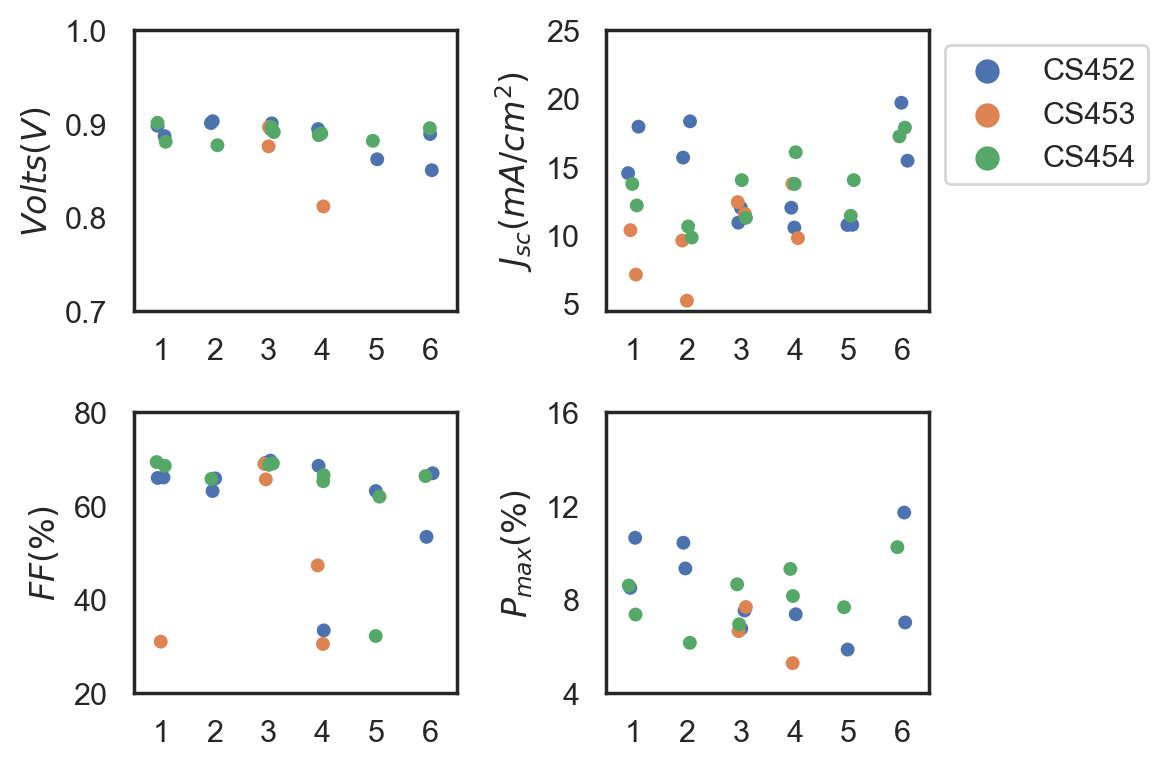

In [20]:
# Plotting "position" plot with legend

sns.set_theme(style="white",palette='deep')

fig, axes= plt.subplots(2,2,dpi=200)
#figlegend = plt.figure(figsize=(3,2))

sns.stripplot(ax=axes[(0,0)], x="pos", y="vals", hue='piece',data=voc_df_split )
sns.stripplot(ax=axes[(0,1)], x="pos", y="vals", hue='piece', data=jsc_df_split)
sns.stripplot(ax=axes[(1,0)], x="pos", y="vals", hue='piece', data=ff_df_split)
sns.stripplot(ax=axes[(1,1)], x="pos", y="vals", hue='piece', data=pmax_df_split)
#axes[0,0].set_yticks([.]) 

for i in [0,1]:
    for j in [0,1]:
        axes[i,j].legend_.remove()
        axes[i,j].set_xlabel('')
axes[0,1].legend(bbox_to_anchor=(1, 1), loc=2)  

axes[0,0].set_yticks([0.7, 0.8, 0.9, 1.0]) 
axes[0,1].set_yticks([5,10,15,20,25]) 
axes[1,0].set_yticks([20,40,60,80]) 
axes[1,1].set_yticks([4,8,12,16]) 

axes[0,1].set_xticklabels([1,2,3,4,5,6]) 
axes[1,0].set_xticklabels([1,2,3,4,5,6])
axes[1,1].set_xticklabels([1,2,3,4,5,6])
axes[0,0].set_xticklabels([1,2,3,4,5,6])


axes[0,0].set_ylabel('$Volts (V)$')
axes[0,1].set_ylabel('$J_{sc} (mA/cm^{2})$')
axes[1,0].set_ylabel('$FF (\%)$')
axes[1,1].set_ylabel('$P_{max} (\%)$')



plt.tight_layout()

plt.savefig('position-plots',bbox_inches='tight',dpi=200)
#figlegend.show()

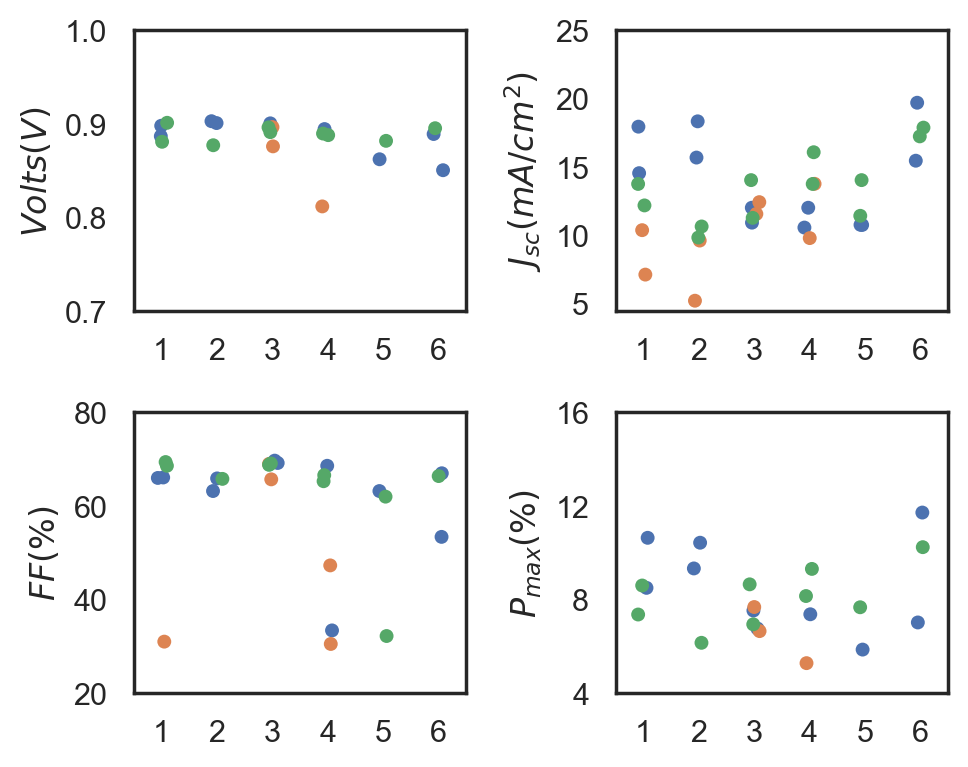

In [21]:
# Plotting "position" plot without legend (preferred, then add own legend when presenting)

font = {'size' : 100}

sns.set_context(font_scale=3)
sns.set_theme(style="white",palette='deep')

fig, axes = plt.subplots(2,2, dpi=200, figsize=(5,4))

#figlegend = plt.figure(figsize=(3,2))

sns.stripplot(ax=axes[(0,0)], x="pos", y="vals", hue='piece',data=voc_df_split )
sns.stripplot(ax=axes[(0,1)], x="pos", y="vals", hue='piece', data=jsc_df_split)
sns.stripplot(ax=axes[(1,0)], x="pos", y="vals", hue='piece', data=ff_df_split)
sns.stripplot(ax=axes[(1,1)], x="pos", y="vals", hue='piece', data=pmax_df_split)
#axes[0,0].set_yticks([.]) 

for i in [0,1]:
    for j in [0,1]:
        axes[i,j].legend_.remove()
        axes[i,j].set_xlabel('')

#axes[0,1].legend(bbox_to_anchor=(1, 1), loc=2)  

axes[0,0].set_yticks([0.7, 0.8, 0.9, 1.0]) 
axes[0,1].set_yticks([5,10,15,20,25]) 
axes[1,0].set_yticks([20,40,60,80]) 
axes[1,1].set_yticks([4,8,12,16]) 

axes[0,1].set_xticklabels([1,2,3,4,5,6]) 
axes[1,0].set_xticklabels([1,2,3,4,5,6])
axes[1,1].set_xticklabels([1,2,3,4,5,6])
axes[0,0].set_xticklabels([1,2,3,4,5,6])

#axes[0,0].set_title('$V_{oc}$')
#axes[0,1].set_title('$J_{sc}$')
#axes[1,0].set_title('$FF$')
#axes[1,1].set_title('$P_{max}$')

axes[0,0].set_ylabel('$Volts (V)$')
axes[0,1].set_ylabel('$J_{sc} (mA/cm^{2})$')
axes[1,0].set_ylabel('$FF (\%)$')
axes[1,1].set_ylabel('$P_{max} (\%)$')



plt.tight_layout()

plt.savefig('position-plots',bbox_inches='tight',dpi=200)
#figlegend.show()

In [22]:
#Creating a summary file of all films and doing some quick statistical calculations

filenames=[]
run=[]
piece=[]
cell=[]
voc=[]
jsc=[]
ff=[]
pce=[]
means=[]
stds=[]
ci1=[]
ci2=[]
counts=[]

#Import all files ending with jvtst and save to a list
for filename in os.listdir(directory):
    if filename.endswith('jvtst'):
        newfilename=filename[:-6]
        df=pd.read_csv(filename,sep='\t',names=list('abcdefgh'),encoding='cp1252')
        run.append(newfilename[14:-3])
        piece.append(newfilename[-3:-2])
        cell.append(newfilename[-1:])
        filenames.append(newfilename)
        #print(newfilename)
        voc.append(float(df['c'][13]))
        jsc.append(float(df['c'][14])*-1000)
        ff.append(float(df['c'][15]))
        pce.append(float(df['c'][16])*-1000)

parameters=["Voc",'Jsc','FF','PCE']        
means.append(np.nanmean(voc))
means.append(np.nanmean(jsc))
means.append(np.nanmean(ff))
means.append(np.nanmean(pce))

stds.append(st.sem(voc, nan_policy='omit'))
stds.append(st.sem(jsc, nan_policy='omit'))
stds.append(st.sem(ff, nan_policy='omit'))
stds.append(st.sem(pce, nan_policy='omit'))

counts.append(np.count_nonzero(~np.isnan(voc)))
counts.append(np.count_nonzero(~np.isnan(jsc)))
counts.append(np.count_nonzero(~np.isnan(ff)))
counts.append(np.count_nonzero(~np.isnan(pce)))


n=len(filenames)
for i in range(len(means)):
    confidenceinterval=st.t.interval(alpha=0.95, df=counts[i],loc=means[i],scale=stds[i])
    ci1.append(confidenceinterval[0])
    ci2.append(confidenceinterval[1])



tempdict1={'filename':filenames,
           'Run':run,
           'Piece':piece,
           'Cell':cell,
           'Voc':voc,
           'Jsc':jsc,
           'FF':ff,
           'PCE':pce}
Data=pd.DataFrame(data=tempdict1)
Data.to_csv('JVSummary.csv')
               
tempdict2={"JVParameter":parameters,
            'Mean':means,
            'Standard Error':stds,
            'Count':counts,
            '95%Confidence':ci1,
            '95%Confidence2':ci2}
Stats=pd.DataFrame(data=tempdict2)
Stats.to_csv('JVStats.csv')
               